# I. Setup

In [67]:
# import
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, RobustScaler, LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# import dataset et preproc
data = pd.read_csv("data/dataset.csv", sep = ",")
data = data.drop("total_length", axis=1)
data.dropna(subset=['certificate_eligible', 'grade'], inplace = True)
data['diplome'] = LabelEncoder().fit_transform(data['certificate_eligible'])
data.head()

,user,gender,country,level_of_education,course_id,nb_threads,nb_comments,corpus,delai_1er_post,grade,certificate_eligible,diplome
10,-Luca-,NaN,NaN,NaN,course-v1:MinesTelecom+04017+session03,0,1,"Bonjour, je m'appelle Luca, je suis consultant...",5,0.38,N,0
44,0cbr,NaN,NaN,NaN,course-v1:MinesTelecom+04018+session03,0,1,"Bonjour,\nJ'ai le même type de pb .\nJe n arri...",28,0.80,Y,1
46,0cbr,NaN,NaN,NaN,MinesTelecom/04021S02/session02,1,0,Beaucoup de temps passé sur le net pour compre...,26,0.35,N,0
57,123AZER,NaN,NaN,NaN,CNAM/01002S04/session04,1,0,"Bonjour, Nicolas 50 ans Officier de Sapeurs-Po...",10,0.77,Y,1
68,12nono12,NaN,NaN,NaN,MinesTelecom/04017S02/session02,0,1,"En fait dans le simulateur, le servo moteur se...",31,0.98,Y,1


In [45]:
data.describe(include = object)

,user,gender,country,level_of_education,course_id,corpus,certificate_eligible
count,5349,869,589,656,5349,5349,5349
unique,4329,2,37,9,15,5349,2
top,EGo41,m,FR,m,MinesTelecom/04017/session01,"Bonjour, je m'appelle Luca, je suis consultant...",Y
freq,14,758,484,286,868,1,3308


In [46]:
data.describe(exclude = object)

,nb_threads,nb_comments,delai_1er_post,grade
count,5349.000000,5349.000000,5349.000000,5349.000000
mean,1.276313,3.496354,15.509441,0.618854
std,1.856361,20.364191,22.865337,0.367677
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000,0.260000
50%,1.000000,1.000000,9.000000,0.770000
75%,1.000000,2.000000,20.000000,0.950000
max,25.000000,614.000000,931.000000,1.000000


# Plots

## par user/mooc

In [94]:
data.head()

,user,gender,country,level_of_education,course_id,nb_threads,nb_comments,corpus,delai_1er_post,grade,certificate_eligible,diplome
10,-Luca-,NaN,NaN,NaN,course-v1:MinesTelecom+04017+session03,0,1,"Bonjour, je m'appelle Luca, je suis consultant...",5,0.38,N,0
44,0cbr,NaN,NaN,NaN,course-v1:MinesTelecom+04018+session03,0,1,"Bonjour,\nJ'ai le même type de pb .\nJe n arri...",28,0.80,Y,1
46,0cbr,NaN,NaN,NaN,MinesTelecom/04021S02/session02,1,0,Beaucoup de temps passé sur le net pour compre...,26,0.35,N,0
57,123AZER,NaN,NaN,NaN,CNAM/01002S04/session04,1,0,"Bonjour, Nicolas 50 ans Officier de Sapeurs-Po...",10,0.77,Y,1
68,12nono12,NaN,NaN,NaN,MinesTelecom/04017S02/session02,0,1,"En fait dans le simulateur, le servo moteur se...",31,0.98,Y,1


/tmp/ipykernel_54890/1794321463.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

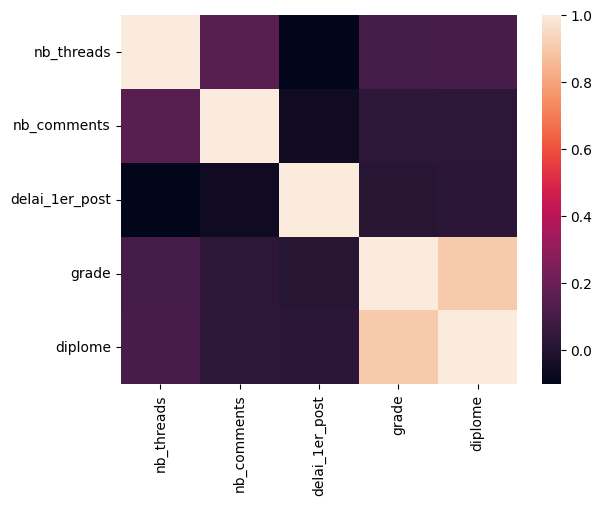

In [95]:
sns.heatmap(data.corr())

plot certif_elig selon var cat

In [99]:
# data_by_certif = data.groupby('certificate_eligible')[['gender','country','level_of_education']].count().reset_index()
# data_by_certif

,certificate_eligible,gender,country,level_of_education
0,N,308,198,222
1,Y,561,391,434


In [100]:
#plot certif elig selon gender
# fig = px.bar(data_by_certif, 
#              x="gender", 
#              y="certificate_eligible", 
#              title="Nb de messages par user")
# fig.show()


## par user

In [79]:
# calcul par user de:
# count de mooc
data_by_user = data.groupby('user')['course_id'].count().reset_index()

# somme de threads et comments
nb_mess = data.groupby('user')[['nb_threads','nb_comments']].sum().reset_index()

#moyenne de delai de post du premier message
moy_delai = data.groupby('user')['delai_1er_post'].mean().reset_index()

# nb de diplomes
nb_diplome = data.groupby('user')['diplome'].sum().reset_index()

# rassembler les variables dans le df
data_by_user[['nb_threads','nb_comments']] = nb_mess[['nb_threads','nb_comments']]
data_by_user['moy_delai'] = moy_delai["delai_1er_post"]
data_by_user['nb_diplome'] = nb_diplome["nb_diplome"]

#calcul de nouvelles variables intermediaires
data_by_user['nb_messages'] = data_by_user["nb_threads"] + data_by_user["nb_comments"]
data_by_user['prop_succes'] = data_by_user["nb_diplome"] / data_by_user["course_id"]
data_by_user = data_by_user.rename(columns = {"course_id" : "nb_mooc"})
# data_by_user

# on devrait pouvoir rajouter les infos de genre, country et level of ed avec une methode de groupby... peut etre unique?
gender = data.groupby('user')["gender"].first().reset_index()
data_by_user['gender'] = gender["gender"]

country = data.groupby('user')["country"].first().reset_index()
data_by_user['country'] = country["country"]

level_of_education = data.groupby('user')["level_of_education"].first().reset_index()
data_by_user['level_of_education'] = level_of_education["level_of_education"]

data_by_user

,user,nb_mooc,nb_threads,nb_comments,moy_delai,nb_diplome,nb_messages,prop_succes,gender,country,level_of_education
0,-Luca-,1,0,1,5.0,0,1,0.0,None,None,None
1,0cbr,2,1,1,27.0,1,2,0.5,None,None,None
2,123AZER,1,1,0,10.0,1,1,1.0,None,None,None
3,12nono12,1,0,1,31.0,1,1,1.0,None,None,None
4,181250,1,1,0,9.0,0,1,0.0,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
4324,zoam14NORA,1,1,0,34.0,0,1,0.0,m,FR,el
4325,zoublos,1,0,2,64.0,1,2,1.0,None,None,None
4326,zraoul,1,0,1,13.0,0,1,0.0,None,None,None
4327,zrash,2,5,3,9.5,1,8,0.5,None,None,None


### Corr heatmap

/tmp/ipykernel_54890/327953006.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

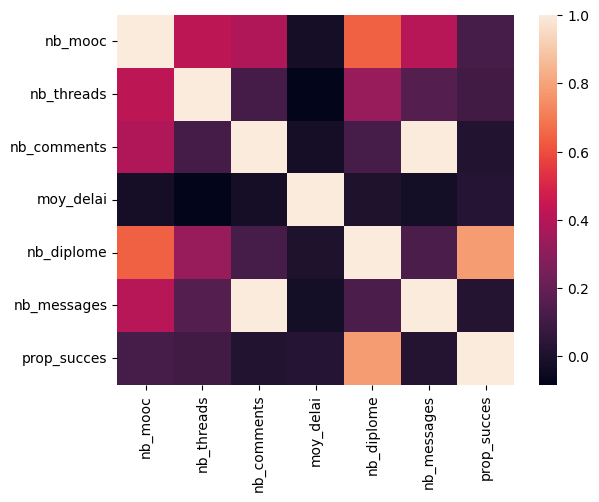

In [80]:
# correlation heatmap
sns.heatmap(data_by_user.corr())

### repartition des genres, country, level_of_ed

In [81]:
# pieplot du nb de genre
fig = px.pie(data_by_user, 
             values='nb_mooc', 
             names='gender', 
             title='Répartition des genres des users')
fig.show()

In [82]:
# pieplot du nb de country
fig = px.pie(data_by_user, 
             values='nb_mooc', 
             names='country', 
             title='Répartition des pays des users')
fig.show()

In [88]:
# on drop les null
# pas forcément utile car on peut déselectionner null sur plotly pour avoir le même résultat
fig = px.pie(data_by_user.dropna(subset="country"), 
             values='nb_mooc', 
             names='country', 
             title='Répartition des pays des users')
fig.show()

In [89]:
# pieplot du nb de levels_of_education
fig = px.pie(data_by_user, 
             values='nb_mooc', 
             names='level_of_education', 
             title="Répartition des niveaux d'étude des users")
fig.show()
# se renseigner sur les significations !

### exploration des users

In [61]:
# plot nb de mooc par user, mappé par le taux de succès
fig = px.bar(data_by_user.sort_values(by='nb_mooc', ascending = False)[:100], 
             x='user', 
             y='nb_mooc',
             title="Nombre de MOOC par user",
             color='prop_succes')
fig

In [62]:
#  nb messages et threads par user
fig = px.bar(data_by_user.sort_values(by='nb_messages', ascending = False)[:100], 
             x="user", 
             y=["nb_threads", "nb_comments"], 
             title="Nb de messages par user")
fig.show()

In [64]:
# nb_threads par user
fig = px.bar(data_by_user.sort_values(by='nb_threads', ascending = False)[:100], 
             x="user", 
             y="nb_threads", 
             title="Nb de threads par user")
fig.show()

In [101]:
# prop succès en fonction du nb messages
fig = px.scatter(data_by_user, 
             x="nb_messages", 
             y="prop_succes", 
             title="Prop succès selon nb messages")
fig.show()

In [102]:
fig = px.scatter(data_by_user, 
             x="nb_threads", 
             y="prop_succes", 
             title="Prop succès selon nb threads")
fig.show()

In [103]:
fig = px.scatter(data_by_user, 
             x="nb_comments", 
             y="prop_succes", 
             title="Prop succès selon nb comments")
fig.show()

Au vu de ces différentes infos, on va retirer seulement EGo41 du dataset car les autres points ne semblent pas être des outliers